In [1]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
dados= pd.read_csv("Anatel.csv")

linhas= dados.index
colunas= dados.columns

Data_Filter = dados.copy()

Data_Filter = Data_Filter[ dados["ANO_BASE"] > 2016]
Data_Filter = Data_Filter[ Data_Filter["E1"] == 1]
Data_Filter = Data_Filter[ Data_Filter["E7"] == 1]
Data_Filter = Data_Filter[ Data_Filter["F3"] == 1]
Data_Filter = Data_Filter[ Data_Filter["A1_1"] == 1]


Data_Filter["ESTADO"] = Data_Filter["ESTADO"].astype('category').cat.codes
Data_Filter["OPERADORA"] = Data_Filter["OPERADORA"].astype('category').cat.codes
Data_Filter.drop("Q2", inplace= True, axis = 1)
Data_Filter.drop("Q2_1", inplace= True, axis = 1)
Data_Filter.drop("Q2_2", inplace= True, axis = 1)
Data_Filter.drop("Q3", inplace= True, axis = 1)
Data_Filter.drop("Q4", inplace= True, axis = 1)
Data_Filter.drop("Q7a", inplace= True, axis = 1)
Data_Filter.drop("A1_1", inplace= True, axis = 1)
Data_Filter.drop("A1_4", inplace= True, axis = 1)
Data_Filter.drop("A4", inplace= True, axis = 1)
Data_Filter.drop("IDTNS", inplace= True, axis = 1)
Data_Filter.drop("G1", inplace= True, axis = 1)
Data_Filter.drop("G2_1", inplace= True, axis = 1)
Data_Filter.drop("G2_2", inplace= True, axis = 1)
Data_Filter.drop("G2_3", inplace= True, axis = 1)
Data_Filter.drop("E1", inplace= True, axis = 1)
Data_Filter.drop("E4", inplace= True, axis = 1)
Data_Filter.drop("E6", inplace= True, axis = 1)
Data_Filter.drop("E7", inplace= True, axis = 1)
Data_Filter.drop("F2_1", inplace= True, axis = 1)
Data_Filter.drop("F2_2", inplace= True, axis = 1)
Data_Filter.drop("F2_3", inplace= True, axis = 1)
Data_Filter.drop("F3", inplace= True, axis = 1)
Data_Filter.drop("I1", inplace= True, axis = 1)
Data_Filter.drop("PESO", inplace= True, axis = 1)
Data_Filter.drop("Q1", inplace= True, axis = 1)
Data_Filter.drop("Q6", inplace= True, axis = 1)
Data_Filter.drop("H3", inplace= True, axis = 1)
Data_Filter.drop("COD_IBGE", inplace= True, axis = 1)
Data_Filter.drop("H2a", inplace= True, axis = 1)
Data_Filter.drop("I2", inplace= True, axis = 1)
Data_Filter.drop("TIPO", inplace= True, axis = 1)
Data_Filter.drop("DATA", inplace= True, axis = 1)
Data_Filter.drop("H0", inplace= True, axis = 1)





Data_Filter["A1_2"] = Data_Filter["A1_2"].replace(2,1)
Data_Filter["A1_3"] = Data_Filter["A1_3"].replace(3,1)
Data_Filter["A1_2"] = Data_Filter["A1_2"].fillna(2)
Data_Filter["A1_3"] = Data_Filter["A1_3"].fillna(2)

Data_Filter.loc[Data_Filter.J1 >= 7, "J1"] = "SATISFEITO"
Data_Filter.loc[Data_Filter.J1 != "SATISFEITO", "J1"] = "INSATISFEITO"

Data_Filter["J1"] = Data_Filter["J1"].replace("SATISFEITO",1)
Data_Filter["J1"] = Data_Filter["J1"].replace("INSATISFEITO",0)


C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Split

In [2]:

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
Dados_Y = Data_Filter["J1"].copy()
Dados_X = Data_Filter.copy()
Dados_X.drop("J1", inplace= True, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Dados_X, Dados_Y, test_size=0.3,random_state=109) # 70% training and 30% test


## Indicadores de Precisão 

- Previsão: Acurácia das Previsões positivas;

precisão = (TP/(TP+FP))

- Revocação (Recall): Taxa de Instâncias positivas que são identificadas pelo classificador; 

revocação = (TP/(TP+FN))
            
|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     TN    |     FP    |
|     1    |     FN     |     TP    |

TN = True Negative
FP = False Positive
FN = False Negative
TP = True Positive

- Score F1: É uma média harmônica entre precisão e revocação. A média harmônica da mais peso para valores baixos, ou seja, para ter um F1 alto, deve-se ter um valor alto para Revocação e Precisão.

> Análise de Precisão e Revocação: A ideia de ter uma precisão e revocação iguais não é necessariamente o objetivo. Por exemplo, em caso do treinamento de uma ML para detectar vídeos para crianças é melhor ter uma precisão alta, para que apenas vídeos adequados passem, mas a Revocação pode ser baixa, ou seja, alguns vídeos não passem. Para detecção de Doenças, é melhor um revocação alta, onde ele detecta quase 100% dos doentes, mas erra pessoas que não tem a doença (Revocação ALTA e Precisão BAIXA). 

### Compensação da Precisão/Revocação

O classificador calcula uma pontuação através de uma função de decisão, se esse resultado for maior que um limiar, ele classifica como Positivo, caso contrário Negativo. Ou seja, se você altera o limiar, ocorre uma compensação na Precisão e Revocação. A figura abaixo mostra como a Taxa de Falsos Positivos e Falsos Negativos mudam conforme a mudança dos Trherholds. 

![](https://developers.google.com/machine-learning/crash-course/images/ROCCurve.svg)

- Curva ROC:Plot entre a Taxa de Falsos Positivos (FPR) x Verdadeiros posisitos (TPR). Quanto maior a Revocação (TPR - TAXA DE VERDADIEROS POSITIVOS), mais falsos positivos o Classificador Produz.

**TPR** = TAXA DE VERDADEIROS POSITIVOS > Ou seja, quantos valores Positivos foram realmente classificados como positivos (Outro nome para revocação)

**FPR** = TAXA DE FALSOS POSITIVOS > Ou seja, a taxa de instâncias negativas incorretamente classificadas como positivas.

> Um bom classificador a curva fica o mais distante possivel da linha pontilhada. 

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score


# SVM

In [4]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmSVM = confusion_matrix(y_test, y_pred)

pSVM = precision_score(y_test,y_pred)
rSVM = recall_score(y_test,y_pred)
F1SVM = f1_score(y_test, y_pred)
print(pSVM)
print(rSVM)
print(F1SVM)

Accuracy: 0.7598597721297108
0.7691815856777494
0.5438517179023508
0.6371822033898306


0.7202510808234914


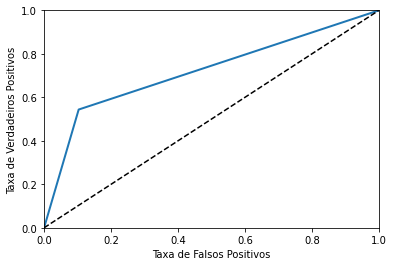

In [6]:
##Curva ROC

fprSVM, tprSVM, threshold = roc_curve(y_test,y_pred)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")

plot_roc_curve(fprSVM,tprSVM)
aucSVM = roc_auc_score(y_test,y_pred)
print(aucSVM)

## Results

Matriz de Confusão

**\>7** 

|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     4062    |     352    |
|     1    |     720     |     571    |

Accuracy: 0.8120946538124453

**\>=7** 

|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     3132    |     361    |
|     1    |     1009     |     1203    |

Accuracy: 0.7598597721297108

Precisão: 0.7691815856777494

Revocação: 0.5438517179023508

F1: 0.6371822033898306

aucScore = 0.7202510808234914

Ou seja, detectou apenas 50% dos 1's e acertou apenas 76% na detecção de 1's.

# Logistics Regression

In [7]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8068361086765995
Precisão: 0.7675988428158148
Recall: 0.7197106690777577
F1Score: 0.7428838077461501
AUC Score: 0.7908602014154893


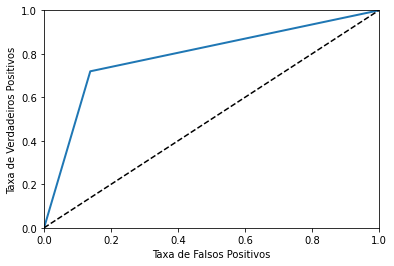

In [9]:
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_pred = logisticRegr.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmLR = confusion_matrix(y_test, y_pred)

##Indicadores

pLR = precision_score(y_test,y_pred)
rLR = recall_score(y_test,y_pred)
F1LR = f1_score(y_test, y_pred)
print("Precisão:", pLR)
print("Recall:", rLR)
print("F1Score:", F1LR)
fprLR, tprLR, threshold_LR = roc_curve(y_test,y_pred)
plot_roc_curve(fprLR,tprLR)
aucLR = roc_auc_score(y_test,y_pred)
print("AUC Score:",aucLR)


## Results
**\>7** 

|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     4199    |     215    |
|     1    |     869     |     422    |

Accuracy: 0.8099912357581069

**\>=7** 

|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     3011    |     482    |
|     1    |     620     |     1592   |

Accuracy: 0.8068361086765995

Precisão: 0.7675988428158148

Recall: 0.7197106690777577

F1Score: 0.7428838077461501

AUC Score: 0.7908602014154893

Para Regressão Logística ele acertou 72% dos 1's e teve uma precisão de 76%, ou seja 24% de Falsos Negativos (Onde era para ser 1, ele dectou como 0). A curva ROC se mostrou próxima da Linha, mas mais distante que o SVM. 

## KNN

Accuracy: 0.7985977212971078
Precisão: 0.7324005247048535
Recall: 0.7572332730560579
F1Score: 0.7446099133140698
AUC Score: 0.7910128575414844


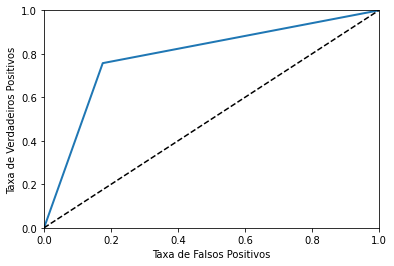

In [10]:
from sklearn.neighbors import KNeighborsClassifier

Knn_Class = KNeighborsClassifier()

Knn_Class.fit(X_train, y_train)
y_pred = Knn_Class.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred)
plot_roc_curve(fprKNN,tprKNN)

aucKNN = roc_auc_score(y_test,y_pred)

print("AUC Score:",aucKNN)

## Results

**\>7** 

|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     4020    |     394    |
|     1    |     573     |     718    |

Accuracy: 0.8304995617879053

**\>=7** 

|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     2881    |     612    |
|     1    |     537     |     1675    |

Accuracy: 0.7985977212971078

Precisão: 0.7324005247048535

Recall: 0.7572332730560579

F1Score: 0.7446099133140698

AUC Score: 0.7910128575414844

Novamente existem valores muito próximos entre precisão e Recall, tudo em torno de 75%. Ou seja, ao mesmo tempo que a técnica acerta 75% dos positivos totais, ele também tem uma acurácia das previsões positivas de 75%. Equilíbrio entre as partes. 

# Random Forest


Accuracy: 0.8562664329535495
Precisão: 0.8298578199052132
Recall: 0.7915913200723327
F1Score: 0.8102730217491901
AUC Score: 0.8444071687679154


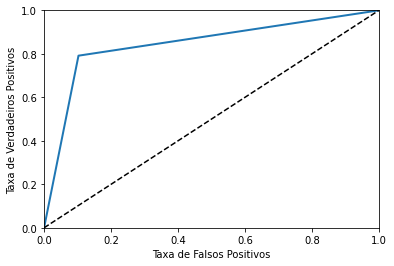

In [11]:
from sklearn.ensemble import RandomForestClassifier

Rand_Forest_Class = RandomForestClassifier()

Rand_Forest_Class.fit(X_train, y_train)

y_pred = Rand_Forest_Class.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmRF = confusion_matrix(y_test, y_pred)


pRF = precision_score(y_test,y_pred)
rRF = recall_score(y_test,y_pred)
F1RF = f1_score(y_test, y_pred)
print("Precisão:", pRF)
print("Recall:", rRF)
print("F1Score:", F1RF)
fprRF, tprRF, threshold_RF = roc_curve(y_test,y_pred)
plot_roc_curve(fprRF,tprRF)
aucRF = roc_auc_score(y_test,y_pred)
print("AUC Score:",aucRF)

## Results
**\>7**

|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     4174    |     240    |
|     1    |     527     |     864    |

Accuracy: 0.8830850131463628

**\>=7** 

|          |     0       |     1      |
|----------|-------------|------------|
|     0    |     3140    |     353    |
|     1    |     468     |     1744   |

Accuracy: 0.856091148115688

Precisão: 0.8316642823080591

Recall: 0.7884267631103075

F1Score: 0.809468554188907

AUC Score: 0.8444071687679154

Aqui existe uma precisão maior que o Recall, significa que existem vários Falsos Negativos, pois muitos 1's não são detectados, mas muito 0 foi detectado como 1 ou Falsos Positivos. A curva ROC Distancia um pouco mais. 

Text(0, 0.5, 'Taxa de Verdadeiros Positivos')

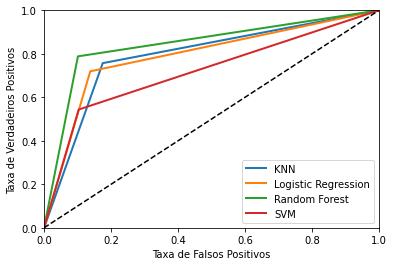

In [17]:
plt.plot(fprKNN, tprKNN, linewidth = 2, label = "KNN")
plt.plot(fprLR, tprLR, linewidth = 2, label = "Logistic Regression")
plt.plot(fprRF, tprRF, linewidth = 2, label = "Random Forest")
plt.plot(fprSVM, tprSVM, linewidth = 2, label = "SVM")
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.legend()
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")

| Técnica             | Acurácia           | Precisão           | Revocação          | F1 Score           | ROC AUC            |
|---------------------|--------------------|--------------------|--------------------|--------------------|--------------------|
| SVM                 | 0.7598 | 0.7691 | 0.5438 | 0.6371| 0.7202 |
| Logistic Regression | 0.8068 | 0.7675 | 0.7197 | 0.7428 | 0.7908 |
| Random Forest       | 0.8560  | 0.8316 | 0.7884 | 0.8094  | 0.8444 |
| KNN                 | 0.7985 | 0.7324 | 0.7572 | 0.7446 | 0.7910 |